# Creating a convolutional network from scratch

The code cells below initialize and train a CNN for classifying the bat data from scratch.  In order to run these cells, you will need both the test data and training data directories linked in the repository's read me.  You will also need to update the file path variables in the 'loading the data' cell

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers

2023-12-04 23:07:40.204433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
conv_network = models.Sequential()
conv_network.add(layers.Conv2D(20, (5,5), activation='relu', input_shape=(232, 154, 3)))
conv_network.add(layers.Dropout(0.2))
conv_network.add(layers.Conv2D(20, (5,5), activation='relu'))
conv_network.add(layers.Dropout(0.2))
conv_network.add(layers.MaxPooling2D(3,3))
conv_network.add(layers.Conv2D(20, (5,5), activation='relu'))
conv_network.add(layers.Dropout(0.2))
conv_network.add(layers.Conv2D(10, (5,5), activation='relu'))
conv_network.add(layers.Dropout(0.2))
conv_network.add(layers.MaxPooling2D(3,3))
conv_network.add(layers.Flatten())
conv_network.add(layers.Dense(4, activation='softmax'))

optimizer=tf.keras.optimizers.Adam(learning_rate=0.02)

conv_network.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

conv_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 228, 150, 20)      1520      
                                                                 
 dropout (Dropout)           (None, 228, 150, 20)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 146, 20)      10020     
                                                                 
 dropout_1 (Dropout)         (None, 224, 146, 20)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 48, 20)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 44, 20)        10020     
                                                        

### Loading in the data

In [3]:
train_data_dir = "/Users/kerickwalker/src/dis/deep_learning/train_bat_data"
test_data_dir = "/Users/kerickwalker/src/dis/deep_learning/test_bat_data"
# Update these file paths in acccordance with your local machine

img_width = 154
img_height = 232
batch_size = 32

training_data = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.11,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.11,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
    
)

Found 1809 files belonging to 4 classes.
Using 1611 files for training.
Found 1809 files belonging to 4 classes.
Using 198 files for validation.
Found 199 files belonging to 4 classes.


### Training our network

In [4]:
conv_network.fit(training_data, validation_data=validation_data, epochs=10)

Epoch 1/10


2023-12-04 23:07:46.751346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1611]
	 [[{{node Placeholder/_4}}]]
2023-12-04 23:07:46.751648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1611]
	 [[{{node Placeholder/_4}}]]


51/51 [==============================] - ETA: 0s - loss: 2.7320 - accuracy: 0.6468

2023-12-04 23:10:24.172587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [198]
	 [[{{node Placeholder/_4}}]]
2023-12-04 23:10:24.173620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [198]
	 [[{{node Placeholder/_4}}]]


51/51 [==============================] - 163s 3s/step - loss: 2.7320 - accuracy: 0.6468 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 2/10
51/51 [==============================] - 162s 3s/step - loss: 2.7320 - accuracy: 0.6567 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 3/10
51/51 [==============================] - 173s 3s/step - loss: 2.7320 - accuracy: 0.6561 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 4/10
51/51 [==============================] - 165s 3s/step - loss: 2.7320 - accuracy: 0.6561 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 5/10
51/51 [==============================] - 169s 3s/step - loss: 2.7320 - accuracy: 0.6561 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 6/10
51/51 [==============================] - 155s 3s/step - loss: 2.7320 - accuracy: 0.6561 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 7/10
51/51 [==============================] - 118s 2s/step - loss: 2.7320 - accuracy: 0.6574 - val_loss: 2.7601 - val_accuracy: 0.6919
Epoch 8/10
51/51 [======

### Evaluation

In [5]:
score = conv_network.evaluate(
    x = test_data, 
    batch_size = batch_size
)

2023-12-04 23:33:40.008340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [199]
	 [[{{node Placeholder/_4}}]]
2023-12-04 23:33:40.009375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [199]
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 3s 430ms/step - loss: 2.7249 - accuracy: 0.6633


# Transfer Learning with MobileNetV2

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

### Loading in the data

In [7]:
# Generate training and validation data.
# Here we used ImageDataGenerator for easy preprocessing
# and data augmentation.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.11
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1612 images belonging to 4 classes.
Found 197 images belonging to 4 classes.


In [8]:
# Generate test data.  No data augmentation is done here.

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 199 images belonging to 4 classes.


### Creating the model

In [9]:
base_model = MobileNetV2(
    input_shape=(232, 154, 3),
    include_top=False,
    weights='imagenet'
)

In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Training the Model

In [13]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10


2023-12-04 23:33:46.369713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.7424

2023-12-04 23:34:42.223903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 63s 1s/step - loss: 0.6620 - accuracy: 0.7424 - val_loss: 0.4276 - val_accuracy: 0.8426
Epoch 2/10
50/50 [==============================] - 45s 899ms/step - loss: 0.2919 - accuracy: 0.8886 - val_loss: 0.3839 - val_accuracy: 0.8680
Epoch 3/10
50/50 [==============================] - 45s 896ms/step - loss: 0.2520 - accuracy: 0.8981 - val_loss: 0.3031 - val_accuracy: 0.8731
Epoch 4/10
50/50 [==============================] - 44s 877ms/step - loss: 0.2038 - accuracy: 0.9203 - val_loss: 0.3626 - val_accuracy: 0.8832
Epoch 5/10
50/50 [==============================] - 44s 880ms/step - loss: 0.1796 - accuracy: 0.9411 - val_loss: 0.2978 - val_accuracy: 0.8934
Epoch 6/10
50/50 [==============================] - 50s 1s/step - loss: 0.1741 - accuracy: 0.9361 - val_loss: 0.4179 - val_accuracy: 0.8629
Epoch 7/10
50/50 [==============================] - 49s 981ms/step - loss: 0.1522 - accuracy: 0.9386 - val_loss: 0.2484 - val_accuracy: 0.9137
Epoch 8/10
50/50

### Evaluation

In [14]:
score = model.evaluate(
    x = test_generator, 
    batch_size = batch_size
)

print(score)

2023-12-04 23:41:48.478467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 5s 736ms/step - loss: 0.1476 - accuracy: 0.9246
[0.1475735455751419, 0.9246231317520142]


In [15]:
# ONLY RUN THIS BLOCK IF YOU WANT TO SAVE THE CURRENT MODEL
# (Again, file path should be changed to reflect local file structure)

model.save('/Users/kerickwalker/src/dis/deep_learning/bat/model.keras')

# Further Exploration of the Data

### Plotting Training vs. Validation Accuracy during training

[]

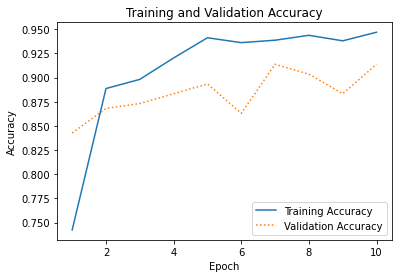

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label = 'Training Accuracy')
plt.plot(epochs, val_acc, ':', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

### Creating a Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

X_test = []
for i in range(len(test_generator)):
    batch = test_generator[i]
    X_batch = batch[0]
    X_test.append(X_batch)
    
X_test = np.concatenate(X_test)

y_test = []
for i in range(len(test_generator)):
    batch = test_generator[i]
    y_batch = batch[1]
    y_test.append(y_batch)
    
y_test = np.concatenate(y_test)

In [18]:
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(conf_matrix)

7/7 [==============================] - 5s 600ms/step
[[60  0  0  0]
 [ 0 30  0  1]
 [ 0  0 69  5]
 [ 0  1  3 30]]


Text(89.133125, 0.5, 'Actual label')

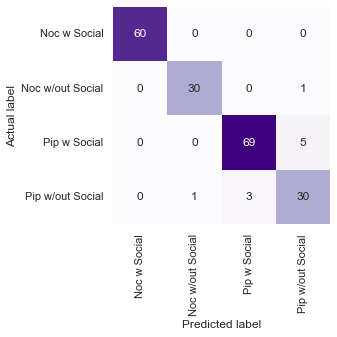

In [19]:
import seaborn as sns

sns.set()

labels = ["Noc w Social", "Noc w/out Social", "Pip w Social", "Pip w/out Social"]
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Purples',
           xticklabels = labels,
           yticklabels = labels
           )

plt.xlabel('Predicted label')
plt.ylabel('Actual label')